In [3]:
!pip install -q seaborn
!pip install tensorflow

You should consider upgrading via the '/Users/sidneyarcidiacono/Projects/spd_housing/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/sidneyarcidiacono/Projects/spd_housing/env/bin/python -m pip install --upgrade pip' command.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
df = pd.read_csv('./kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [10]:
#train the model with 80% of the data
train_dataset = df.sample(frac=0.8, random_state=0)
#to see how well it does with other 20% of the data
test_dataset = df.drop(train_dataset.index)

In [11]:
#Separate the target value, the "label", from the features. This label is the value that you will train the model to predict
train_features = train_dataset.copy().drop(['date'], axis=1)
test_features = test_dataset.copy().drop(['date'], axis=1)

# This label is what the model will predict. In our case, price.
train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

train_features = train_features[["sqft_living", "bedrooms", "bathrooms"]]
test_features = test_features[["sqft_living", "bedrooms", "bathrooms"]]
print(train_features)

       sqft_living  bedrooms  bathrooms
17384         1430         2       1.50
722           4670         4       3.25
2680          1440         2       0.75
18754         1130         2       1.00
14554         3180         4       2.50
...            ...       ...        ...
7372          2470         6       3.00
8118          1220         3       2.00
16465         1910         4       2.75
16197         2600         4       2.75
17185         1630         3       1.50

[17290 rows x 3 columns]


In [12]:
#The preprocessing.Normalization layer is a clean and simple way to build that preprocessing into your model.
#features are factors to our goal we are looking for
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
#This calculates the mean and variance, and stores them in the layer.

In [13]:
#When the layer is called it returns the input data, with each feature independently normalized:
first = np.array(train_features['sqft_living'][:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [1430]

Normalized: [[  -0.71 1577.29 1861.73]]


In [14]:
# DNN Regression solution rather than linear model. We're going to see if added hidden layers improve our prediction!
def build_and_compile_model(norm):
    model = keras.Sequential([
    norm,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])

    model.compile(loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001))
    return model  

In [15]:
dnn_pricing_model = build_and_compile_model(normalizer)

In [16]:
dnn_pricing_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 3)                 7         
_________________________________________________________________
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,488
Trainable params: 4,481
Non-trainable params: 7
_________________________________________________________________


In [17]:
%%time
predict_model = dnn_pricing_model.fit(
  train_features['sqft_living'], train_labels,
  validation_split=0.2,
  verbose=0, epochs=100)

CPU times: user 42.7 s, sys: 8.83 s, total: 51.5 s
Wall time: 29.5 s


In [18]:
hist = pd.DataFrame(predict_model.history)
hist['epoch'] = predict_model.epoch
hist.tail()

,loss,val_loss,epoch
95,167299.296875,171455.859375,95
96,167302.390625,170901.406250,96
97,167224.375000,170894.046875,97
98,167282.015625,171290.921875,98
99,167381.046875,170826.734375,99


In [19]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1000000])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Price]')
    plt.legend()
    plt.grid(True)

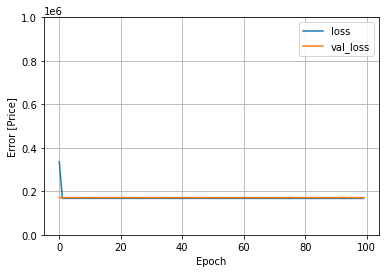

In [20]:
plot_loss(predict_model)

In [21]:
x = tf.linspace(0.0, 250, 251)
y = dnn_pricing_model.predict(x)

In [22]:
# Save model so that we can use it in our Flask application
dnn_pricing_model.save('/Users/sidneyarcidiacono/Projects/spd_housing/my_model')

INFO:tensorflow:Assets written to: /Users/sidneyarcidiacono/Projects/spd_housing/my_model/assets
